Michigan
80
('urcrnrlat', 47.89988536)
('llcrnrlat', 40.88753639)
('urcrnrlon', -81.67937954)
('llcrnrlon', -90.69377193)
drawing image from arcGIS server... ...finished


{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Sat May 30 11:20:50 +0000 2020',
 u'entities': {u'hashtags': [{u'indices': [0, 9], u'text': u'Michigan'},
   {u'indices': [11, 18], u'text': u'arcGIS'},
   {u'indices': [26, 34], u'text': u'Basemap'},
   {u'indices': [35, 41], u'text': u'COVID'},
   {u'indices': [47, 54], u'text': u'Python'},
   {u'indices': [96, 109], u'text': u'JupyterJones'}],
  u'media': [{u'display_url': u'pic.twitter.com/hWdxBQE1YT',
    u'expanded_url': u'https://twitter.com/JackLNorthrup/status/1266691032327966720/photo/1',
    u'id': 1266691027168931840,
    u'id_str': u'1266691027168931840',
    u'indices': [110, 133],
    u'media_url': u'http://pbs.twimg.com/media/EZQwxyqUMAAEZM3.png',
    u'media_url_https': u'https://pbs.twimg.com/media/EZQwxyqUMAAEZM3.png',
    u'sizes': {u'large': {u'h': 688, u'resize': u'fit', u'w': 720},
     u'medium': {u'h': 688, u'resize': u'fit', u'w': 720},
     u'small': {u'h': 650, u'resize': u'fit', u'w': 680},
  

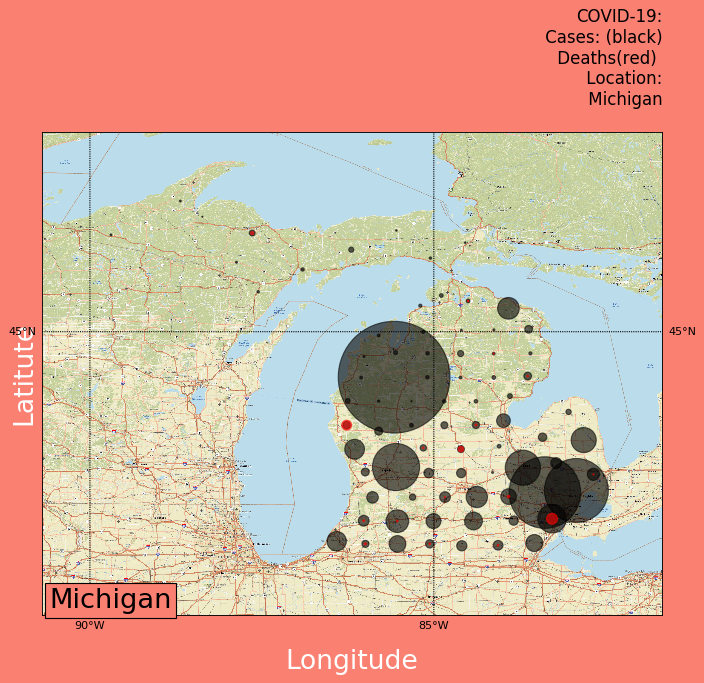

In [3]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
import requests as req


def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]
URL="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-29-2020.csv"
response = req.get(URL)
DataIn= response.text
DataIn = DataIn.splitlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]

search = RndState()
print(search)
cnt =0
for line in DataIn:
    #if cnt==0:print(line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10:print(line[2],line[5],line[6],line[7],line[8])
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[5],line[6],line[7],line[8]
        # line[2]  line[5],     line[6],      line[7], line[8]
        # Oklahoma 35.88494195  -94.65859267  82       3
        # print(text)
        STATES.append(text)
        if int(line[7])>0:
            LAT.append(line[5])
            LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])

print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+1
llcrnrlat=min(LT)-1
urcrnrlon=max(LG)+1
llcrnrlon=min(LG)-1
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

print("urcrnrlat",urcrnrlat)
print("llcrnrlat",llcrnrlat)
print("urcrnrlon",urcrnrlon)
print("llcrnrlon",llcrnrlon)

# create the map object, m
m = Basemap(resolution='h', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
'''
# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
'''
#m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, #zorder=2, drawbounds=True)
'''
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon+.1,llcrnrlat+.1, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))
'''
# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
#m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
m.arcgisimage(service=maps[1], xpixels=3500, verbose=False,zorder=20)
print ("...finished")
# Draw some map elements on the map
'''m.drawmapboundary()
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1,ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2 )
'''
plt.text(llcrnrlon+.1,llcrnrlat+.1, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.1)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('\nLongitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='red', zorder=10,  alpha=0.6)
merid = m.drawmeridians(
    np.arange(-180, 180, 5), 
    labels=[False, False, False, True])
parall = m.drawparallels(
    np.arange(0, 80,5), 
    labels=[True, True, False, False])



plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)



filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
response = twitter.upload_media(media=photo)
twitter.update_status(status=STR, media_ids=[response['media_id']])

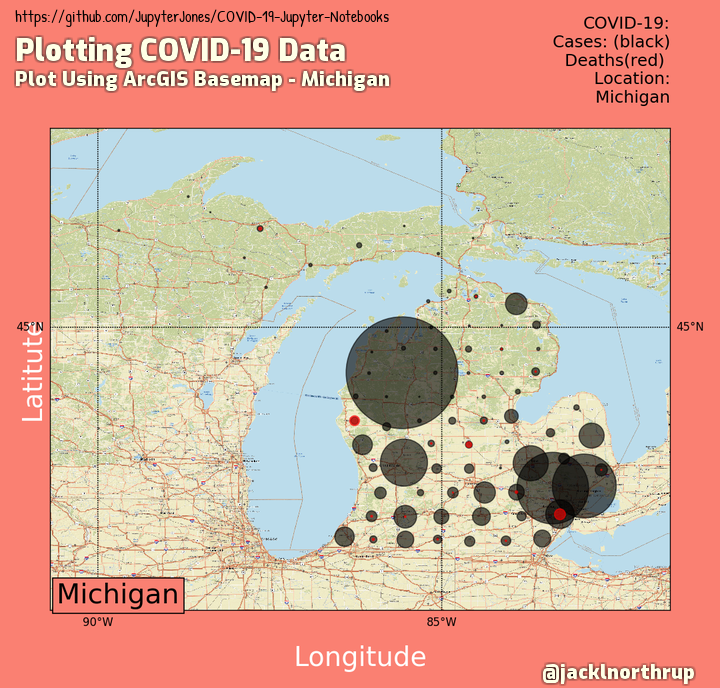

In [4]:
from PIL import Image
IM =Image.open(PATH)
IM

drawing image from arcGIS server... ...finished
26_May_20204_maps.png


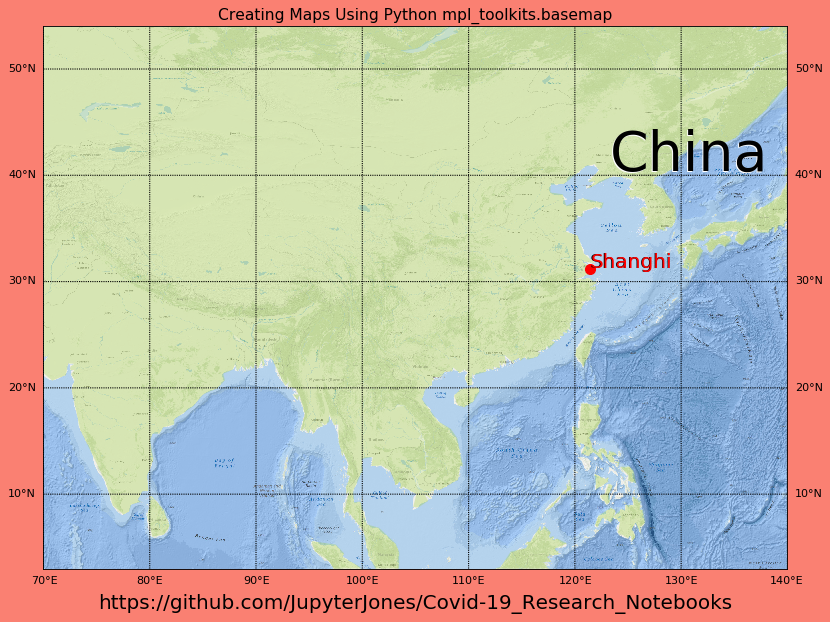

In [30]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import time
import matplotlib.pyplot as plt
water = 'lightskyblue'
earth = 'yellowgreen'

Shanghi_lon, Shanghi_lat = 121.4365047,31.21645245


fig, ax1 = plt.subplots(figsize=(12, 10), dpi=80, facecolor='salmon')
#mm = Basemap(
#    width=600000, height=400000,
#    resolution='i',
#    projection='aea',
#    ellps='WGS84',
#    lat_1=55., lat_2=65.,
#    lat_0=31., lon_0=122.)

#m = Basemap(resolution='h', projection='cyl', \
#    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)
mm=Basemap(llcrnrlon=70, llcrnrlat=3, urcrnrlon=140, urcrnrlat=54)


maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
Maps=4
mm.arcgisimage(service=maps[Maps], xpixels=35000, verbose=False)
#mm.arcgisimage(service=maps[4], xpixels=35000, verbose=False)
#mm.arcgisimage(service=maps[7], xpixels=35000, verbose=False)
#mm.arcgisimage(service=maps[10], xpixels=3500, verbose=False,zorder=20)
print ("...finished")


#coast = mm.drawcoastlines()
#rivers = mm.drawrivers(color="navy", linewidth=1.5)
continents = mm.fillcontinents(
    color=earth,
    lake_color=None, alpha=.3)
#bound= mm.drawmapboundary()
#countries = mm.drawcountries()

merid = mm.drawmeridians(
    np.arange(-180, 180, 10), 
    labels=[False, False, False, True])
parall = mm.drawparallels(
    np.arange(0, 80, 10), 
    labels=[True, True, False, False])

x,y=mm(123.3,40.4)          
plt.text(x, y, "China", fontsize=50, color="black",zorder=11) 
x,y=mm(123.2,40.3)          
plt.text(x, y, "China", fontsize=50, color="white",zorder=10) 

x,y=mm(121.4365047,31.31645245)          
plt.text(x, y, "Shanghi", fontsize=18, color="red",zorder=11)
x,y=mm(121.430,31.310)          
plt.text(x, y, "Shanghi", fontsize=18.1, color="black",zorder=10) 
plt.xlabel('\nhttps://github.com/JupyterJones/Covid-19_Research_Notebooks', fontsize=18)
plt.title('Creating Maps Using Python mpl_toolkits.basemap', fontsize=14)
x, y = mm(Shanghi_lon, Shanghi_lat)
Shanghi = mm.scatter(x, y, 80,
    label="Shanghi", color='red', zorder=10)

filename = time.strftime('%d_%b_%Y',time.gmtime())+str(Maps)+"_maps.png"
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black', bbox_inches='tight')
print(filename)

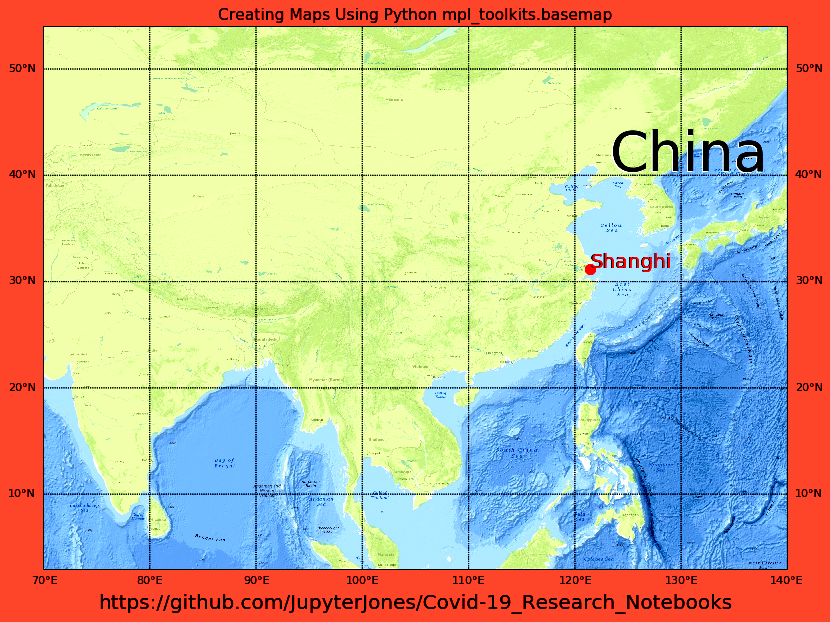

In [31]:
from PIL import Image
IM =Image.open(filename)
IM

from PIL import Image, ImageEnhance
image = Image.open(filename)
scale_value=2
image = ImageEnhance.Contrast(image).enhance(scale_value)
image

In [10]:
def main2():
    from mpl_toolkits.basemap import Basemap
    import numpy as np
    import matplotlib.pyplot as plt
    # llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
    # are the lat/lon values of the lower left and upper right corners
    # of the map.
    # resolution = 'i' means use intermediate resolution coastlines.
    # lon_0, lat_0 are the central longitude and latitude of the projection.
    m = Basemap(llcrnrlon=70, llcrnrlat=3, urcrnrlon=140, urcrnrlat=54,
                resolution='i', projection='tmerc',
                lon_0=107, lat_0=24)
    # can get the identical map this way (by specifying width and
    # height instead of lat/lon corners)
    # m = Basemap(width=894887,height=1116766,\
    #            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
    m.drawcoastlines()
    m.fillcontinents(color='coral', lake_color='aqua')
    # m.drawparallels(np.arange(-40, 61., 2.))
    # m.drawmeridians(np.arange(-20., 21., 2.))
    m.drawmapboundary(fill_color='aqua')
    plt.title("Transverse Mercator Projection")
    plt.show() 

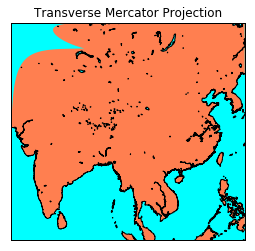

In [11]:
main2()